<img src='https://lh3.googleusercontent.com/3zkP2SYe7yYoKKe47bsNe44yTgb4Ukh__rBbwXwgkjNRe4PykGG409ozBxzxkrubV7zHKjfxq6y9ShogWtMBMPyB3jiNps91LoNH8A=s500' alt='YouTube'>

**<h1> Caracterización de videos en tendencia de YouTube US </h1>**


Fuente: https://www.kaggle.com/datasnaek/youtube-new

> Se pretender realizar la caracterización de los videos tendencia de YouTube US entre 2017 y 2018 mendiante análisis textual (NLP) y métricas (likes, views, etc...).

**Nota:** Puede demorarse en cargar los gráficos.


---

# 1. Entendimiento del negocio

## 1.1 Objetivos

- Caracterizar mediante estadística descriptiva y análisis textual los videos que fueron tendencia en el periodo de 2017 a 2018.

- Buscar palabras frecuentes en los campos textuales de la plataforma: Título, descripción, tags.

- Obtener visualizaciones como nubes de palabras, gráficos de barras, entre otros, que ayuden a tener un mejor entendimiento del comportamiento de los videos que fueron tendencia.

Esto podría ser de interés para las personas o compañías que buscan, o bien, generar tendencia, o saber qué temas toman relevancia en cierto periodo temporal.

## 1.2 Metas

- Encontrar palabras o métricas discriminantes para los videos que fueron tendencia en US entre los años de 2017 y 2018.

- Descubrir la relación entre las variables ofrecidas por la plataforma por las que un video se considera tendencia.

## 1.3 Planeación



1.   Adquisición de los datos en: https://www.kaggle.com/datasnaek/youtube-new
2. Filtrar los datos de interés de esta fuente.
3. Transformar los datasets a una forma estructurada.
4. Realizar un análisis exploratorio.
5. Limpiar los datasets.
6. Aplicar un modelo NLP para la extracción de información textual.
7. Resultados.



# 2. Entendimiento de los datos

## 2.0 Módulos

Se instalan, cargan y configuran los módulos a utilizar en el proyecto.

In [ ]:
!pip install -U plotly
!pip install unidecode
!python -m spacy download en_core_web_sm

In [ ]:
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import itertools
import spacy
import wordcloud
from unidecode import unidecode as unidec

In [ ]:
pd.options.plotting.backend = 'plotly'
pd.set_option('display.float_format', lambda x: '%.2f' % x)
nlp = spacy.load('en_core_web_sm')  # nlp model

## 2.1 Montar Drive

Se carga el drive para poder tener una mejor gestión de los datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.2 Cargar datos

Se define la dirección donde se guardarán y cargarán archivos.

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/diplomado_ds'

Se cargan 2 archivos que corresponden a la región US los cuales fueron extraídos de Kaggle y almacenados en el drive.

In [ ]:
with open(f'{path}/US_category_id.json') as json_file:  # categorías de los videos
    category_id = json.load(json_file)
 
df_videos = pd.read_csv(f'{path}/USvideos.csv')  # información de los videos

## 2.3 Exploración

### 2.3.1 Categoría del video

Se observa qué información se encuentra en el archivo JSON.

In [ ]:
# llaves del diccionario
category_id.keys()

dict_keys(['kind', 'etag', 'items'])

Se imprimen los primeros 3 elementos que se encuentran con la llave de 'items' del diccionario.

In [ ]:
# 3 primera categorías de los videos
category_id['items'][:3]

[{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'kind': 'youtube#videoCategory',
  'snippet': {'assignable': True,
   'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation'}},
 {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
  'id': '2',
  'kind': 'youtube#videoCategory',
  'snippet': {'assignable': True,
   'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Autos & Vehicles'}},
 {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
  'id': '10',
  'kind': 'youtube#videoCategory',
  'snippet': {'assignable': True,
   'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Music'}}]

Dado que la este apartado contiene la categoría de cada video que se encuentra en el otro archivo, se procede a transformarlo a un dataframe de pandas.

In [ ]:
# json a pandas
df_category_id = pd.json_normalize(category_id['items'], sep='_')

df_category_id.head(3)

kind  ... snippet_assignable
0  youtube#videoCategory  ...               True
1  youtube#videoCategory  ...               True
2  youtube#videoCategory  ...               True

[3 rows x 6 columns]

Se observa que hay 6 variables con 32 observaciones.

In [ ]:
# tamaño del dataframe
df_category_id.shape

(32, 6)

Se tiene que no hay variables numéricas, y hay una booleana.

In [ ]:
# tipo de datos
df_category_id.dtypes

kind                  object
etag                  object
id                    object
snippet_channelId     object
snippet_title         object
snippet_assignable      bool
dtype: object

### 2.3.2 Videos en tendencia

Se imprimen los primeros 3 valores del dataset, y se observa que la variable 'trending_date' no tiene un formato correcto de fecha, además, con ánimo de realizar una comparación de fechas la variable 'publish_time' se podría reformatear para obtener solamente la fecha.

In [ ]:
df_videos.head(3) 

video_id  ...                                        description
0  2kyS6SvSYSE  ...  SHANTELL'S CHANNEL - https://www.youtube.com/s...
1  1ZAPwfrtAFY  ...  One year after the presidential election, John...
2  5qpjK5DgCt4  ...  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...

[3 rows x 16 columns]

Se observa que hay 16 variables y 40949 observaciones.

In [ ]:
# tamaño del dataframe
df_videos.shape

(40949, 16)

Se obtienen 3 variables booleanas y 5 variables numéricas, aunque la variable 'category_id' no debería considerarse numérica dado que al ser categórica etiquetada con un número se podría confundir como un objeto operable.

In [ ]:
# tipo de datos
df_videos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

Se procede a reformatear las variables antes mencionadas.

In [ ]:
# cambiar formato columna 'trending_date' a fecha
df_videos.trending_date = pd.to_datetime(df_videos.trending_date, format='%y.%d.%m', errors='coerce').dt.date

df_videos.trending_date.iloc[:3]

0    2017-11-14
1    2017-11-14
2    2017-11-14
Name: trending_date, dtype: object

In [ ]:
# cambiar formato columna 'publish_time' a fecha
df_videos.publish_time = pd.to_datetime(df_videos.publish_time).apply(lambda x: x.date())

df_videos.publish_time.iloc[:3]

0    2017-11-13
1    2017-11-13
2    2017-11-12
Name: publish_time, dtype: object

In [ ]:
# cambiar formato columna a string
df_videos.category_id = df_videos.category_id.astype(str)

df_videos.category_id.iloc[:3]

0    22
1    24
2    23
Name: category_id, dtype: object

Se obtiene que las métricas de estos videos son, en su mayoría, bajas; por otro lado, se intuye que hay una gran desviación entre estos.

In [ ]:
# resumen del dataframe
df_videos.describe()

views      likes   dislikes  comment_count
count     40949.00   40949.00   40949.00       40949.00
mean    2360784.64   74266.70    3711.40        8446.80
std     7394113.76  228885.34   29029.71       37430.49
min         549.00       0.00       0.00           0.00
25%      242329.00    5424.00     202.00         614.00
50%      681861.00   18091.00     631.00        1856.00
75%     1823157.00   55417.00    1938.00        5755.00
max   225211923.00 5613827.00 1674420.00     1361580.00

Al observar las variables en las que se reflejan si se han desactivado comentarios, calificaciones o el video en sí, se obtiene que la mayoría de estos no han tenido estas modificaciones.

In [ ]:
# tabla de contingencia
pd.crosstab(df_videos['video_error_or_removed'], [df_videos['comments_disabled'], df_videos['ratings_disabled']])

comments_disabled       False       True       
ratings_disabled        False True  False True 
video_error_or_removed                         
False                   40230    63   527   106
True                       23     0     0     0

Con el fin de evaluar la completitud del conjunto de datos, se grafica el número de videos por fecha y se observa que el dataset se empezó a construir en noviembre 14 de 2017 hasta junio 14 de 2018, además, hay algunos huecos temporales entre enero 9 y 12 de 2018, y abril 7 y 14 de 2018. Por otro lado, algunos días no se obtuvo el top 200 de videos en tendencia, por ejemplo, entre enero 30 y febrero 5 de 2018.

In [ ]:
# gráfica de barras de videos por fecha
fig = df_videos.trending_date.value_counts().plot(kind='bar',
                                                  title='Número de videos en tendencia por fecha',
                                                  template='simple_white',
                                                  labels=dict(index='Fecha', value='Conteo')
                                                  )

fig.layout.update(showlegend=False)

fig.show()

Se obtiene que un poco menos de la mitad de estos videos tienen entre 0 y 500k visitas, es decir, tienen pocas visitas, esto se puede deber a que el algoritmo prioriza videos nuevos y se espera que estos tengan un valor bajo en esta métrica.

In [ ]:
fig = (df_videos
       .views
       .plot(kind='histogram',
             title='Porcentaje de videos en tendencia por número de visitas',
             template='simple_white',
             labels=dict(value='Visitas'),
             histnorm='probability'
             )
       )

fig.layout.update(showlegend=False)
fig.update_layout(yaxis_title_text='Porcentaje')
fig.update_xaxes(range=[0, 15000000])
fig.layout.yaxis.tickformat = ',.1%'

fig.show()

Por otro lado, al parecer no hay un canal que tenga muchos videos en tendencia entre este periodo de tiempo, dado que el que mayor porcentaje de aparición tiene es ESPN con 0.5%, por lo tanto, no hay un 'líder' de videos en tendencia.

In [ ]:
fig = (df_videos
       .channel_title
       .value_counts(normalize=True)
       .plot(kind='bar',
             title='Porcentaje de videos en tendencia por canal',
             template='simple_white',
             labels=dict(index='Canal', value='Porcentaje')
             )
       )

fig.layout.update(showlegend=False)
fig.layout.yaxis.tickformat = '.2%'

fig.show()

Si se analizan las métricas como likes, dislikes y comentarios se observa un comportamiento similar al número de vistas estas, en su mayoría, son bajas no sobrepasan los 150k; Por otro lado, hay una gran concentración de datos y también muchos videos que parecen ser atípicos, sin embargo, estos no se elimnan dado que se quiere hacer un análisis textual sobre todos los videos, así que por el momento no es importante eliminarlos, respecto a la concentración se realiza una gráfica posterior para divisar mejor este comportamiento.

In [ ]:
df_videos.channel_title.value_counts(normalize=True)[0]

0.004957386016752546

In [ ]:
# boxplot de métricas de YouTube
df_videos.plot(kind='box',
               title = 'Diagrama de cajas para métricas de los videos en tendencia',
               labels=dict(variable='Métrica', value='Conteo'),
               x=['likes', 'dislikes', 'comment_count']
               )

Se obtiene que en los casos de comentarios y dislikes los videos no sobrepasan los 5k, mientras que en likes parece ser más espaciado, de decir, no hay tanta concentración.

In [ ]:
# histogramas de métricas de YouTube
fig = df_videos.plot(kind='histogram',
                     histnorm='probability',
                     title = 'Porcentaje de videos en tendencia por métricas',
                     template='simple_white',
                     labels=dict(variable='Métrica', value='Conteo de métrica'),
                     marginal='rug',
                     barmode = 'group',
                     x=['likes', 'dislikes', 'comment_count'])

fig.update_layout(yaxis_title_text='Porcentaje')
fig.layout.yaxis.tickformat = ',.1%'
fig.update_xaxes(range=[0, 60000])

fig.show()

Aunque no se eliminaron los posibles datos etípicos se realiza la gráfica de la matriz de correlación para divisar alguna dependencia lineal, y aunque sí se observan valores altos, esta información es algo esperado dada la naturaleza de las métricas.

In [ ]:
# mapa de calor de correlaciones
px.imshow(df_videos[['views', 'likes', 'dislikes', 'comment_count']].corr(), 
          zmin=0.4, 
          zmax=1, 
          title='Correlación entre métricas')

### 2.3.3 Join videos en tendencia con categorías

Se unen los dos datasets anteriores para obtener la categoría de cada video.

In [ ]:
# cambiar nombre de columna para hacer join
df_category_id.rename(columns={'id': 'category_id'}, inplace=True)

In [ ]:
# join
df_join = df_videos.merge(df_category_id, on = 'category_id', how = 'left')

df_join.head(3)

video_id trending_date  ...   snippet_title snippet_assignable
0  2kyS6SvSYSE    2017-11-14  ...  People & Blogs               True
1  1ZAPwfrtAFY    2017-11-14  ...   Entertainment               True
2  5qpjK5DgCt4    2017-11-14  ...          Comedy               True

[3 rows x 21 columns]

Se observa que la mayoría de los videos son de la categoría de Entretenimiento, Música y Estilo.

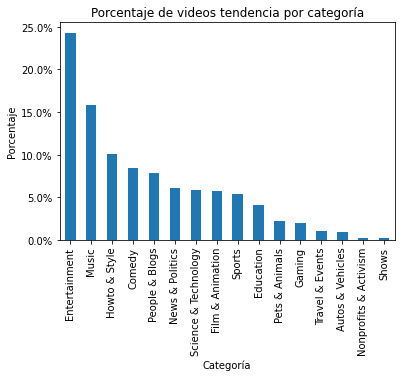

In [ ]:
# categorías de videos más frecuentes
pd.options.plotting.backend = 'matplotlib'

ax = df_join.snippet_title.value_counts(normalize=True).mul(100).plot(kind='bar')
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
ax.set_title('Porcentaje de videos tendencia por categoría')
ax.set_xlabel('Categoría')
ax.set_ylabel('Porcentaje');

# 3. Preparación de los datos

## 3.1 Dataset

In [ ]:
# nombres columnas
df_join.columns.values

array(['video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description',
       'kind', 'etag', 'snippet_channelId', 'snippet_title',
       'snippet_assignable'], dtype=object)

In [ ]:
# filtrar columnas
drop_columns = ['category_id', 'thumbnail_link', 'kind', 'etag', 'snippet_channelId', 'snippet_assignable']

filtered_df = df_join.drop(columns=drop_columns)

filtered_df.head(3)

video_id  ...   snippet_title
0  2kyS6SvSYSE  ...  People & Blogs
1  1ZAPwfrtAFY  ...   Entertainment
2  5qpjK5DgCt4  ...          Comedy

[3 rows x 15 columns]

In [ ]:
# valores faltantes
filtered_df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
snippet_title               0
dtype: int64

In [ ]:
filtered_df = filtered_df.dropna()

In [ ]:
# valores faltantes
filtered_df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
snippet_title             0
dtype: int64

## 3.2 Creación de features

### 3.2.1 Listas de palabras transformadas de las columnas de texto (NLP)

Se crea una función que preprocesa, filtra, lematiza, pone en minúsculas las palabras, y luego las añade a una lista.

In [ ]:
# función que implementa NLP
count = itertools.count(1)

def pipeline_text(text):

    text_rm_symbol = text.replace('|', ' ')
    text_unidec = unidec(text_rm_symbol)
    doc = nlp(text_unidec)
    text_list_non_unique = [word.lemma_.lower() for word in doc if word.is_alpha and not word.is_stop]
    text_list = list(set(text_list_non_unique))
    print(next(count))

    return text_list

In [ ]:
aux_df = filtered_df

In [ ]:
# ciclo en los campos de interés
text_col = ['title', 'tags', 'description']

# for col in text_col:  # se comenta por el tiempo de ejecución
#     count = itertools.count(1)
#     aux_df[f'nlp_{col}'] = aux_df[col].apply(pipeline_text)
#     aux_df.to_parquet(f'{path}/nlp_df.parquet') 

In [ ]:
nlp_df = pd.read_parquet(f'{path}/nlp_df.parquet')

nlp_df.head(3)

video_id  ...                                    nlp_description
0  2kyS6SvSYSE  ...  [project, canon, video, disclosure, answer, li...
1  1ZAPwfrtAFY  ...  [mom, official, election, stuff, far, like, jo...
2  5qpjK5DgCt4  ...  [previous, video, mancuso, puppets, like, watc...

[3 rows x 18 columns]

### 3.2.2 Conteo de carácteres sin preprocesamiento de los campos de texto

Se crea una ciclo para contar el número de carácteres por cada campo de texto.

In [ ]:
aux_df = nlp_df

In [ ]:
text_col = ['title', 'tags', 'description']

# for col in text_col:  # se comenta por el tiempo de ejecución
#     aux_df[f'count_{col}'] = aux_df[col].apply(lambda text: len(text))
#     aux_df.to_parquet(f'{path}/count_nlp_df.parquet')

# aux_df.drop(columns=text_col).to_parquet(f'{path}/count_nlp_df.parquet')

In [ ]:
count_nlp_df = pd.read_parquet(f'{path}/count_nlp_df.parquet')

count_nlp_df.head(3)

video_id trending_date  ... count_tags count_description
0  2kyS6SvSYSE    2017-11-14  ...         17              1412
1  1ZAPwfrtAFY    2017-11-14  ...        104               632
2  5qpjK5DgCt4    2017-11-14  ...        316              1179

[3 rows x 18 columns]

### 3.2.3 Diferencia en días de la fecha de lanzamiento del video y la fecha de tendencia

In [ ]:
day_diff_df = count_nlp_df
day_diff_df['day_difference'] = (
    (day_diff_df.trending_date - day_diff_df.publish_time)
    .astype('timedelta64[D]')
    )

day_diff_df.head(3)

video_id trending_date  ... count_description day_difference
0  2kyS6SvSYSE    2017-11-14  ...              1412           1.00
1  1ZAPwfrtAFY    2017-11-14  ...               632           1.00
2  5qpjK5DgCt4    2017-11-14  ...              1179           2.00

[3 rows x 19 columns]

### 3.2.4 Explotar columnas de texto

In [ ]:
# se expanden las columnas en diferentes datasets
explode_col = ['nlp_title', 'nlp_tags', 'nlp_description']

# aux_df = day_diff_df 
# for col in explode_col:  # se comenta por el tiempo de ejecución
#     diff_list = list(set(explode_col) - set([col])) + ['index']

#     (aux_df
#      .explode(col)
#      .reset_index()
#      .drop(columns=diff_list)
#      .dropna()
#      .to_parquet(f'{path}/{col}_df.parquet'))
    
# aux_df.drop(columns=explode_col).to_parquet(f'{path}/non_text_df.parquet')

# 4. Análisis de datos

In [ ]:
nlp_title_df = pd.read_parquet(f'{path}/nlp_title_df.parquet')
nlp_tags_df = pd.read_parquet(f'{path}/nlp_tags_df.parquet')
nlp_description_df = pd.read_parquet(f'{path}/nlp_description_df.parquet')

non_text_df = pd.read_parquet(f'{path}/non_text_df.parquet')

In [ ]:
data_size = non_text_df.shape[0]

**Respecto a las palabras halladas, aunque algunas se ven interesantes, se debe incluir videos que no hayan estado en tendencia para realizar un modelo que tenga en cuenta la relevancia de las palabras y no la frencuencia de estas.**

## 4.1 Palabras más frecuentes en el título

In [ ]:
nlp_title_df.head(3)

video_id trending_date  ... count_tags count_description
0  2kyS6SvSYSE    2017-11-14  ...         17              1412
1  2kyS6SvSYSE    2017-11-14  ...         17              1412
2  2kyS6SvSYSE    2017-11-14  ...         17              1412

[3 rows x 16 columns]

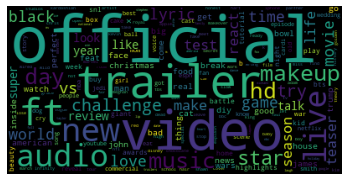

In [ ]:
freq_dict = dict(nlp_title_df.nlp_title.value_counts().iloc[:500])

wordcloud_plot = wordcloud.WordCloud().generate_from_frequencies(freq_dict)

plt.imshow(wordcloud_plot)
plt.axis("off")
plt.show()

In [ ]:
fig = (nlp_title_df
       .nlp_title
       .value_counts()
       .iloc[:100]
       .truediv(data_size)
       .plot(kind='bar',
             title='Porcentaje de videos en tendencia por palabra en el título',
             template='simple_white',
             labels=dict(index='Palabra', value='Porcentaje')
             )
       )

fig.layout.update(showlegend=False)
fig.layout.yaxis.tickformat = ',.1%'

fig.show()

## 4.2 Palabras más frecuentes en las etiquetas

In [ ]:
nlp_tags_df.head(3)

video_id trending_date  ... count_description day_difference
0  2kyS6SvSYSE    2017-11-14  ...              1412           1.00
1  2kyS6SvSYSE    2017-11-14  ...              1412           1.00
2  1ZAPwfrtAFY    2017-11-14  ...               632           1.00

[3 rows x 17 columns]

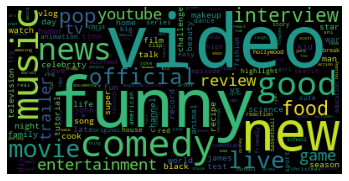

In [ ]:
freq_dict = dict(nlp_tags_df.nlp_tags.value_counts().iloc[:500])

wordcloud_plot = wordcloud.WordCloud().generate_from_frequencies(freq_dict)

plt.imshow(wordcloud_plot)
plt.axis("off")
plt.show()

In [ ]:
fig = (nlp_tags_df
       .nlp_tags
       .value_counts()
       .iloc[:100]
       .truediv(data_size)
       .plot(kind='bar',
             title='Porcentaje de videos en tendencia por palabra en las etiquetas',
             template='simple_white',
             labels=dict(index='Palabra', value='Porcentaje')
             )
       )

fig.layout.update(showlegend=False)
fig.layout.yaxis.tickformat = ',.1%'

fig.show()

## 4.3 Palabras más frecuentes en la descripción

In [ ]:
nlp_description_df.head(3)

video_id trending_date  ... count_description day_difference
0  2kyS6SvSYSE    2017-11-14  ...              1412           1.00
1  2kyS6SvSYSE    2017-11-14  ...              1412           1.00
2  2kyS6SvSYSE    2017-11-14  ...              1412           1.00

[3 rows x 17 columns]

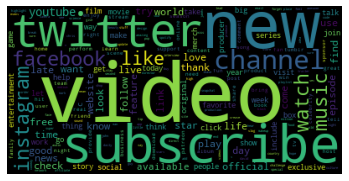

In [ ]:
freq_dict = dict(nlp_description_df.nlp_description.value_counts().iloc[:500])

wordcloud_plot = wordcloud.WordCloud().generate_from_frequencies(freq_dict)

plt.imshow(wordcloud_plot)
plt.axis("off")
plt.show()

In [ ]:
fig = (nlp_description_df
       .nlp_description
       .value_counts()
       .iloc[:100]
       .truediv(data_size)
       .plot(kind='bar',
             title='Porcentaje de videos en tendencia por palabra en la descripción',
             template='simple_white',
             labels=dict(index='Palabra', value='Porcentaje')
             )
       )

fig.layout.update(showlegend=False)
fig.layout.yaxis.tickformat = ',.1%'

fig.show()

## 4.4 Conteo de carácteres y variables numéricas

In [ ]:
non_text_df.head(3)

video_id trending_date  ... count_description day_difference
0  2kyS6SvSYSE    2017-11-14  ...              1412           1.00
1  1ZAPwfrtAFY    2017-11-14  ...               632           1.00
2  5qpjK5DgCt4    2017-11-14  ...              1179           2.00

[3 rows x 16 columns]

In [ ]:
# boxplot de métricas de YouTube
non_text_df.plot(kind='box',
                 title = 'Diagrama de cajas para conteo de carácteres',
                 labels=dict(variable='Carácteres', value='Conteo'),
                 x=['count_title', 'count_tags', 'count_description']
                 )

Al realizar el análisis de correlación no se encuentra alguna relación interesante entre el número de carácteres y las métricas de YouTube.

In [ ]:
# eliminar valores atípicos
num_col = ['views', 'likes', 'dislikes', 
           'comment_count', 'count_title', 
           'count_tags', 'count_description', 
           'day_difference']

num_df = non_text_df
for col in num_col:
    low, high = num_df[col].quantile([0.05,0.95])
    num_df = num_df.query(f'{low}<{col}<{high}')


# graficar correlaciones
px.imshow(num_df[num_col].corr(), 
          title='Correlación entre valores numéricos')

En conclusión, falta trabajo posterior en el cual se puedan incluir videos que no hayan estado en tendencia para poder realizar un análisis de discriminantes entre estos, dado que, aunque se observan palabras interesantes no parecen ser diferentes a cualquier otro video en la plataforma.